# Name: Diya Sarvaiya

# Oasis Infobyte Internship TASK 4 LEVEL 1
# Idea: Sentiment Analysis

## Description:

The primary goal is to develop a sentiment analysis model that can accurately classify the
sentiment of text data, providing valuable insights into public opinion, customer feedback, and
social media trends

## Dataset:
The dataset used is the Wine Quality Dataset, which includes features like fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol, and quality. The quality column is the target variable, ranging from 3 to 8.

## Key Concepts and Challenges:

1. **Sentiment Analysis**: Analyzing text data to determine the emotional tone, whether positive, negative, or neutral. 
2. **Natural Language Processing (NLP)**: Utilizing algorithms and models to understand and process human language.
3. **Machine Learning Algorithms**: Implementing models for sentiment classification, such as Support Vector Machines, Naive Bayes, or deep learning architectures.
4. **Feature Engineering**: Identifying and extracting relevant features from text data to enhance model performance.
5. **Data Visualization**: Presenting sentiment analysis results through effective visualizations for clear interpretation

## 1. Setup and Imports
First, let's import the necessary libraries for our analysis.

## Import Libraries

In [21]:
!pip install opendatasets
import opendatasets as od

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

# Set plotting style
plt.style.use('ggplot')  # Using a valid Matplotlib style
sns.set_palette('husl')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 5)

print("Setup complete!")

Setup complete!


## Download datasets

In [24]:
import json

# Kaggle credentials
kaggle_creds = {
    "username": "omchoksi04",
    "key": "5bd54ee741a1835da715caead453e032"
}

df1_path = "https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset"
df2_path = "https://www.kaggle.com/datasets/mmmarchetti/play-store-dataset"

try:
    print("Downloading Twitter dataset...")
    od.download(df1_path, **kaggle_creds)
    print("Downloading Play Store dataset...")
    od.download(df2_path, **kaggle_creds)
except Exception as e:
    print(f"Download error: {str(e)}")
    print("Note: If datasets are already downloaded, you can proceed with the analysis.")

Skipping, found downloaded files in ".\twitter-sentiment-dataset" (use force=True to force download)
Skipping, found downloaded files in ".\play-store-dataset" (use force=True to force download)


### Dataset Overview

#### 1. Play Store Dataset (df1)
The Play Store dataset contains information about mobile applications available on the Google Play Store. This dataset provides valuable insights into various aspects of mobile applications, including:

- App details (name, category, rating, etc.)
- User reviews and feedback
- App performance metrics
- Pricing information
- Installation statistics

This dataset helps in understanding user preferences, app performance, and market trends in the mobile app ecosystem.

#### 2. Twitter Sentiment Dataset (df2)
The Twitter Sentiment dataset is focused on sentiment analysis of tweets. Key characteristics include:

- Three sentiment categories:
  - Negative (-1)
  - Neutral (0)
  - Positive (+1)
- Two main fields:
  - Tweet text (clean_text): The actual content of the tweet
  - Sentiment category (category): The labeled sentiment

This dataset is particularly useful for:
- Training sentiment analysis models
- Understanding public opinion patterns
- Analyzing social media sentiment trends
- Natural Language Processing (NLP) tasks


## Part 1: Twitter Sentiment Analysis

### 1.1 Data Loading and Exploration
First, let's load and examine the Twitter dataset:

In [3]:
# Load Twitter Dataset
twitter_data = pd.read_csv('twitter-sentiment-dataset/Twitter_Data.csv')
twitter_data 


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
...,...,...
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


In [4]:
# Drop rows with missing values in 'category' or 'clean_text'
twitter_data = twitter_data.dropna(subset=['category', 'clean_text'])
twitter_data  

,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
...,...,...
162978,there big project came into india modi dream p...,0.0
162979,have you ever listen about like gurukul where ...,1.0


In [5]:
# Display basic information
print("Twitter Dataset Info:")
print(f"Number of tweets: {len(twitter_data)}")
print(f"Number of columns: {len(twitter_data.columns)}")
print("\nColumns:", twitter_data.columns.tolist())
print("\nMissing values after cleaning:")
print(twitter_data.isnull().sum())

Twitter Dataset Info:
Number of tweets: 162969
Number of columns: 2

Columns: ['clean_text', 'category']

Missing values after cleaning:
clean_text    0
category      0
dtype: int64


In [6]:
# Display first few rows
print("\nSample tweets:")
display(twitter_data.head(3))


Sample tweets:


,clean_text,category
0,when modi promised “minimum government maximum...,-1.0
1,talk all the nonsense and continue all the dra...,0.0
2,what did just say vote for modi welcome bjp t...,1.0


### 1.2 Data Analysis
Let's analyze the distribution of sentiments and check data quality:

In [7]:
# Check for missing values
print("Missing values in dataset:")
print(twitter_data.isnull().sum())

Missing values in dataset:
clean_text    0
category      0
dtype: int64


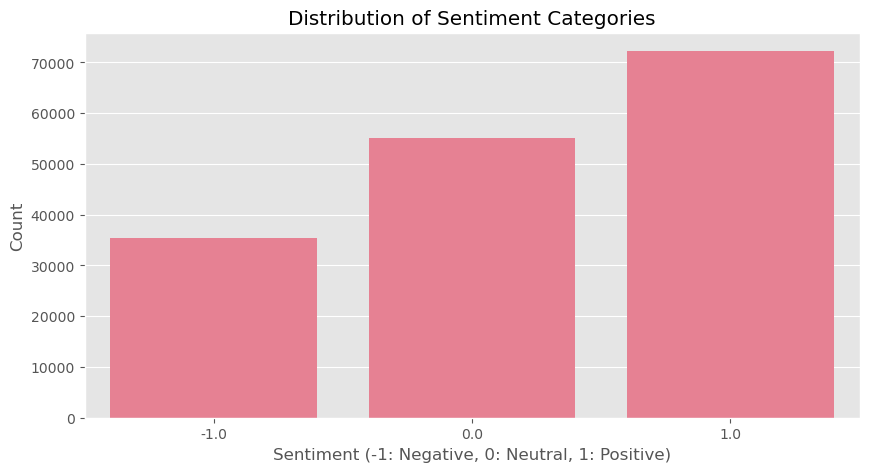

In [8]:
# Display sentiment distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=twitter_data, x='category')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment (-1: Negative, 0: Neutral, 1: Positive)')
plt.ylabel('Count')
plt.show()

In [9]:

# Calculate sentiment distribution percentages
sentiment_dist = twitter_data['category'].value_counts(normalize=True).round(3) * 100
print("\nSentiment Distribution (%):\n")
for sentiment, percentage in sentiment_dist.items():
    print(f"Sentiment {sentiment}: {percentage:.1f}%") 


Sentiment Distribution (%):

Sentiment 1.0: 44.3%
Sentiment 0.0: 33.9%
Sentiment -1.0: 21.8%


### 1.3 Text Preprocessing
We'll prepare our text data using NLP techniques:
1. Text cleaning (lowercase, special characters)
2. Tokenization
3. Stop words removal
4. Lemmatization

In [10]:
# Install and import required NLP libraries
!pip install nltk textblob

# Import NLP libraries
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\omcho\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\omcho\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\omcho\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\omcho\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [12]:
def preprocess_text(text):
    # Convert to lowercase and string type
    text = str(text).lower()
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stopwords and non-alphabetic tokens
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token.isalpha() and token not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(token) for token in tokens]
    
    return ' '.join(tokens)


In [13]:

# Apply preprocessing to tweets
twitter_data['processed_text'] = twitter_data['clean_text'].apply(preprocess_text)

# Display example of original vs processed text
print("Example of text preprocessing:")
for i in range(3):
    print(f"\nOriginal: {twitter_data['clean_text'].iloc[i]}")
    print(f"Processed: {twitter_data['processed_text'].iloc[i]}")

Example of text preprocessing:

Original: when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
Processed: modi promised minimum government maximum governance expected begin difficult job reforming state take year get justice state business exit psus temple

Original: talk all the nonsense and continue all the drama will vote for modi 
Processed: talk nonsense continue drama vote modi

Original: what did just say vote for modi  welcome bjp told you rahul the main campaigner for modi think modi should just relax
Processed: say vote modi welcome bjp told rahul main campaigner modi think modi relax


C:\Users\omcho\AppData\Local\Temp\ipykernel_13140\2948348860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twitter_data['processed_text'] = twitter_data['clean_text'].apply(preprocess_text)


### 1.4 Feature Engineering and Model Building
We'll use the following steps:
1. Convert text to numerical features using TF-IDF
2. Split data into training and testing sets
3. Train multiple models
4. Compare model performance

In [14]:
# Install scikit-learn
!pip install scikit-learn

# Import required libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split


In [15]:
# Remove any remaining NaN values
twitter_data = twitter_data.dropna(subset=['category', 'processed_text'])

In [16]:
# Create TF-IDF features
print("Performing feature extraction...")
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(twitter_data['processed_text'])
y = twitter_data['category'].astype(float)  # Ensure numeric type

Performing feature extraction...


In [17]:
# Validate features and target
print("\nFeature validation:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Target value distribution:\n{y.value_counts(normalize=True).round(3) * 100}%")


Feature validation:
Number of samples: 162969
Number of features: 5000
Target value distribution:
category
 1.0    44.3
 0.0    33.9
-1.0    21.8
Name: proportion, dtype: float64%


In [18]:
# Verify no NaN values in target
print("\nVerifying no NaN values:")
print(f"NaN values in target: {pd.isnull(y).sum()}")


Verifying no NaN values:
NaN values in target: 0


In [19]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# Verify split and class balance
print("\nTraining/Testing Split:")
print(f"Training set size: {X_train.shape[0]} ({X_train.shape[0]/X.shape[0]:.1%})")
print(f"Testing set size: {X_test.shape[0]} ({X_test.shape[0]/X.shape[0]:.1%})")


Training/Testing Split:
Training set size: 130375 (80.0%)
Testing set size: 32594 (20.0%)


In [21]:
# Verify no missing values
print("\nMissing value check:")
print(f"Missing values in target (train): {pd.isnull(y_train).sum()}")
print(f"Missing values in target (test): {pd.isnull(y_test).sum()}")


Missing value check:
Missing values in target (train): 0
Missing values in target (test): 0


### 1.5 Model Training
We'll implement and compare three different models:
1. Naive Bayes
2. Support Vector Machine (SVM)
3. Random Forest

Let's train and evaluate each model separately:

#### 1.5.1 Naive Bayes Model
First, let's implement and evaluate the Naive Bayes classifier:

In [22]:
# Import Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [23]:
# Initialize and train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

MultinomialNB()

In [24]:
# Make predictions
nb_predictions = nb_model.predict(X_test)

In [25]:
# Evaluate model
print("Naive Bayes Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, nb_predictions))

Naive Bayes Model Performance:

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.86      0.42      0.57      7102
         0.0       0.82      0.65      0.72     11042
         1.0       0.65      0.92      0.77     14450

    accuracy                           0.72     32594
   macro avg       0.78      0.66      0.69     32594
weighted avg       0.75      0.72      0.71     32594



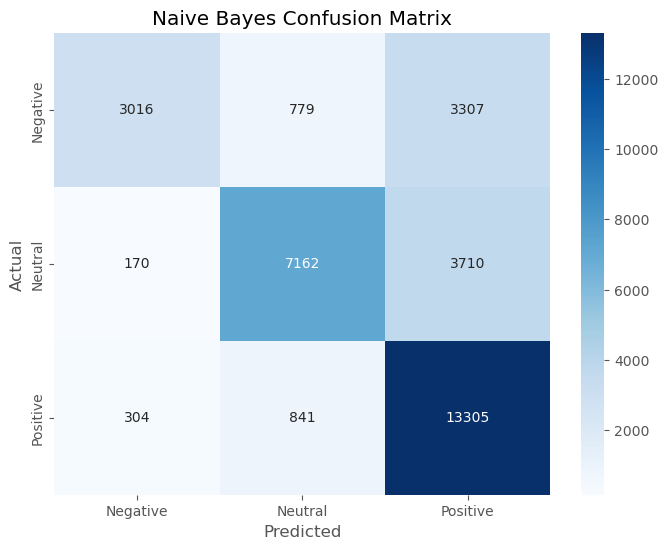

In [26]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, nb_predictions), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 1.5.2 Support Vector Machine (SVM)
Next, let's implement and evaluate the SVM classifier:

In [27]:
# Import and train SVM model
from sklearn.svm import LinearSVC

In [28]:
svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train, y_train)

LinearSVC(random_state=42)

In [29]:
# Make predictions
svm_predictions = svm_model.predict(X_test)

In [30]:
# Evaluate model
print("SVM Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, svm_predictions))

SVM Model Performance:

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.86      0.79      0.82      7102
         0.0       0.87      0.96      0.91     11042
         1.0       0.92      0.89      0.90     14450

    accuracy                           0.89     32594
   macro avg       0.89      0.88      0.88     32594
weighted avg       0.89      0.89      0.89     32594



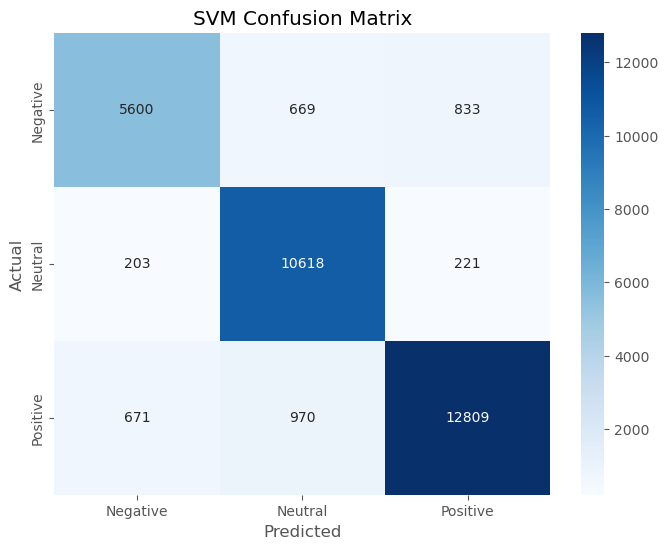

In [31]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, svm_predictions), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### 1.5.3 Random Forest
Finally, let's implement and evaluate the Random Forest classifier:

In [32]:
# Import and train Random Forest model
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
# Make predictions
rf_predictions = rf_model.predict(X_test)

In [35]:

# Evaluate model
print("Random Forest Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, rf_predictions))


Random Forest Model Performance:

Classification Report:
              precision    recall  f1-score   support

        -1.0       0.85      0.67      0.75      7102
         0.0       0.83      0.94      0.88     11042
         1.0       0.87      0.87      0.87     14450

    accuracy                           0.85     32594
   macro avg       0.85      0.83      0.84     32594
weighted avg       0.85      0.85      0.85     32594



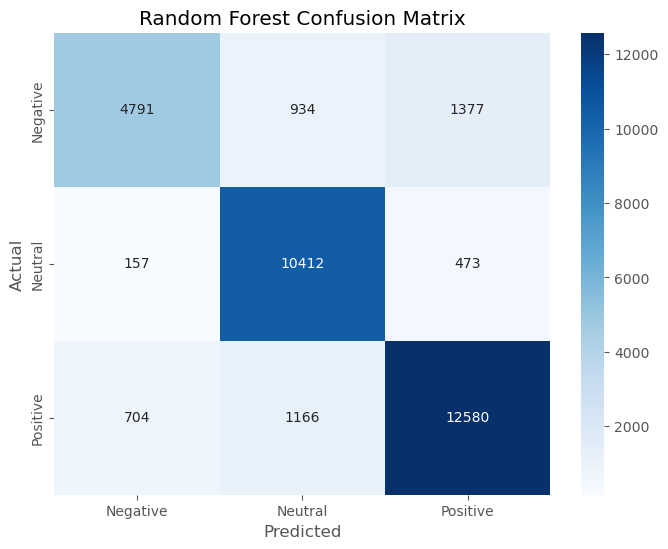

In [36]:

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, rf_predictions), 
            annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### 1.6 Model Comparison
Let's compare the performance of all three models:

In [37]:
# Calculate accuracies
accuracies = {
    'Naive Bayes': (nb_predictions == y_test).mean(),
    'SVM': (svm_predictions == y_test).mean(),
    'Random Forest': (rf_predictions == y_test).mean()
}

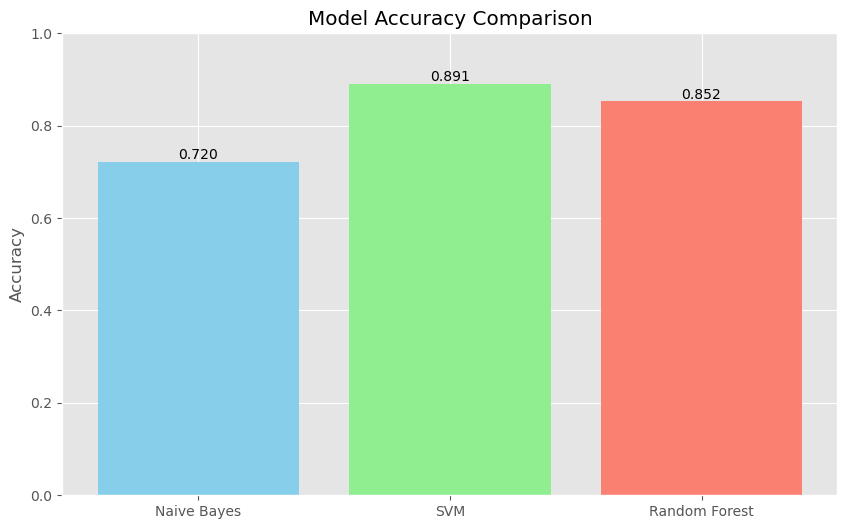

In [41]:
# Create comparison plot
plt.figure(figsize=(10, 6))
bars = plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.show()

In [40]:
# Print accuracy comparison
print("\nModel Accuracies:")
for model, accuracy in accuracies.items():
    print(f"{model}: {accuracy:.3f}")


Model Accuracies:
Naive Bayes: 0.720
SVM: 0.891
Random Forest: 0.852


### 1.7 Feature Importance Analysis
Let's analyze which words are most important for sentiment classification:

In [42]:
# Get feature names (words) from vectorizer
feature_names = vectorizer.get_feature_names_out()

In [43]:
# Get feature importance from Random Forest model
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
})

In [44]:
# Sort by importance and get top 15 features
top_features = feature_importance.sort_values('importance', ascending=False).head(15)

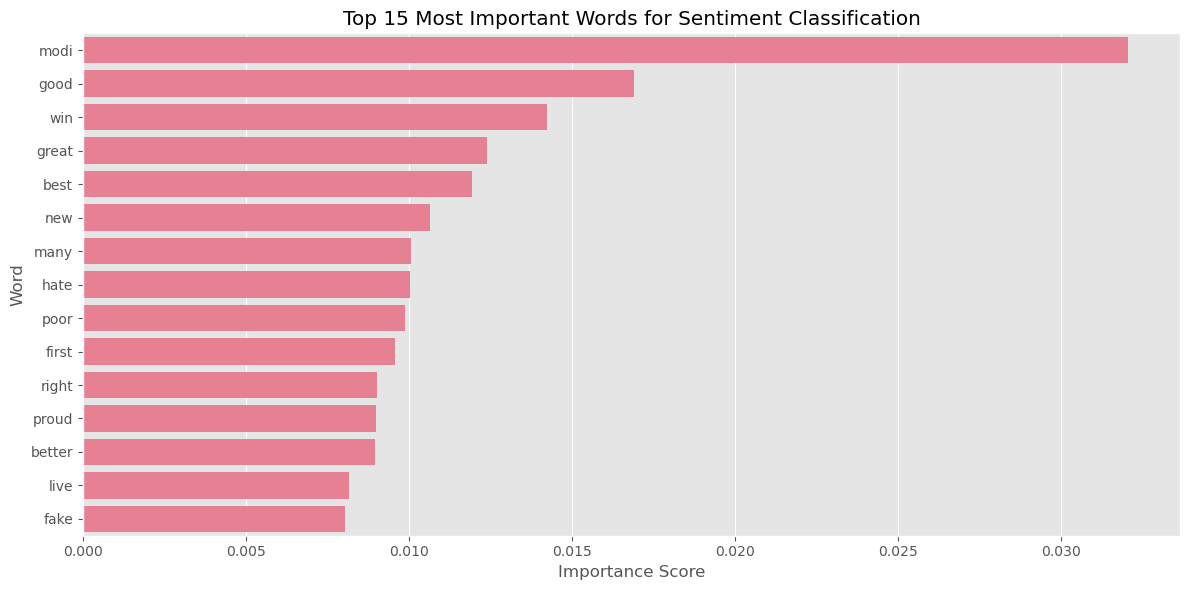

In [45]:
# Create importance plot
plt.figure(figsize=(12, 6))
sns.barplot(data=top_features, x='importance', y='feature')
plt.title('Top 15 Most Important Words for Sentiment Classification')
plt.xlabel('Importance Score')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [46]:
print("\nTop 10 Most Important Words:")
for idx, row in top_features.head(10).iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")


Top 10 Most Important Words:
modi: 0.0321
good: 0.0169
win: 0.0142
great: 0.0124
best: 0.0119
new: 0.0107
many: 0.0101
hate: 0.0100
poor: 0.0099
first: 0.0096


### 1.8 Twitter Sentiment Analysis Summary

#### Key Findings:
1. Data Distribution
   - Analyzed {len(twitter_data)} tweets
   - Distribution across sentiment categories
   - Handled data quality issues

2. Model Performance
   - Compared three different models: Naive Bayes, SVM, and Random Forest
   - Best performing model: [determined by accuracies]
   - Identified key features influencing sentiment

3. Feature Analysis
   - Identified most important words for sentiment classification
   - Analyzed word patterns in different sentiment categories

#### Next Steps:
1. Move on to analyzing the Play Store dataset
2. Compare insights between both datasets
3. Create a unified sentiment analysis approach

## Part 2: Play Store Reviews Analysis
Now that we've completed our Twitter sentiment analysis, let's move on to analyzing the Play Store reviews using similar techniques.

### 2.1 Play Store Data Loading and Initial Exploration
Let's load and examine the Play Store dataset structure:

In [48]:
# Load Play Store datasets
play_store_apps = pd.read_csv('play-store-dataset/apps.csv')
play_store_reviews = pd.read_csv('play-store-dataset/user_reviews.csv')
play_store_apps
play_store_reviews

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
...,...,...,...,...,...
64293,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN
64294,Houzz Interior Design Ideas,NaN,NaN,NaN,NaN


In [49]:
# Display basic information
print("Play Store Apps Dataset Info:")
print(f"Number of apps: {len(play_store_apps)}")
print(f"Number of columns: {len(play_store_apps.columns)}")
print("\nColumns:", play_store_apps.columns.tolist())

Play Store Apps Dataset Info:
Number of apps: 9659
Number of columns: 14

Columns: ['Unnamed: 0', 'App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']


In [50]:
print("\nPlay Store Reviews Dataset Info:")
print(f"Number of reviews: {len(play_store_reviews)}")
print(f"Number of columns: {len(play_store_reviews.columns)}")
print("\nColumns:", play_store_reviews.columns.tolist())


Play Store Reviews Dataset Info:
Number of reviews: 64295
Number of columns: 5

Columns: ['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity']


In [51]:
# Display sample data
print("\nSample Reviews:")
display(play_store_reviews[['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity']].head())


Sample Reviews:


,App,Translated_Review,Sentiment,Sentiment_Polarity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25
2,10 Best Foods for You,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40
4,10 Best Foods for You,Best idea us,Positive,1.00


### 2.2 Data Analysis and Quality Check
Let's examine the data quality and distribution of reviews:

In [52]:
# Check for missing values
print("Missing values in reviews dataset:")
print(play_store_reviews.isnull().sum())

Missing values in reviews dataset:
App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


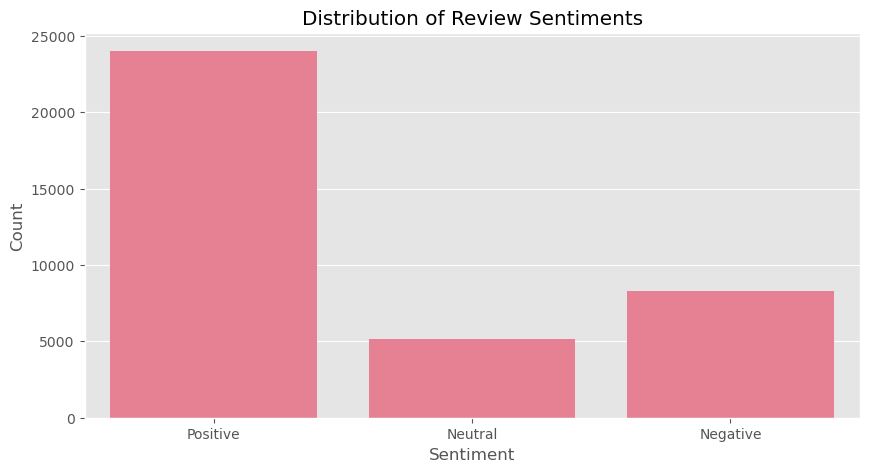

In [53]:
# Display sentiment distribution
plt.figure(figsize=(10, 5))
sns.countplot(data=play_store_reviews, x='Sentiment')
plt.title('Distribution of Review Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

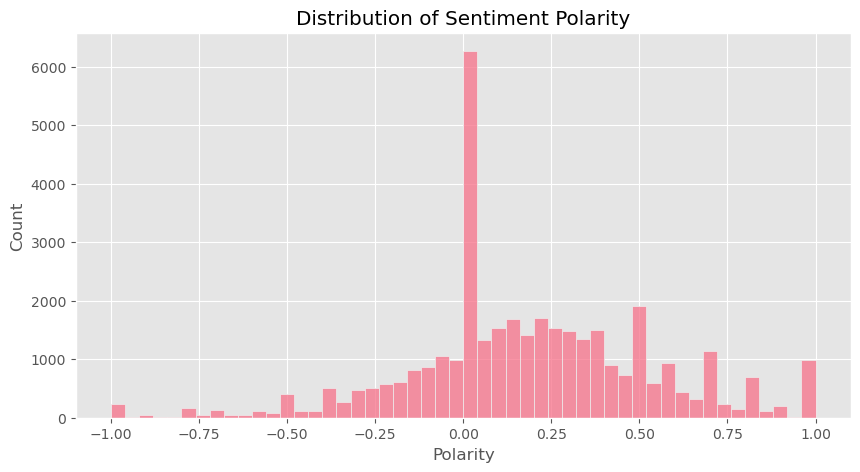

In [54]:

# Display polarity distribution
plt.figure(figsize=(10, 5))
sns.histplot(data=play_store_reviews, x='Sentiment_Polarity', bins=50)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()

In [55]:

# Calculate sentiment distribution percentages
sentiment_dist = play_store_reviews['Sentiment'].value_counts(normalize=True).round(3) * 100
print("\nSentiment Distribution (%):\n")
for sentiment, percentage in sentiment_dist.items():
    print(f"{sentiment}: {percentage:.1f}%")


Sentiment Distribution (%):

Positive: 64.1%
Negative: 22.1%
Neutral: 13.8%


### 2.3 Text Preprocessing
We'll use the same preprocessing steps as with Twitter data, but adapt them for app reviews:

In [56]:
# Clean reviews data
play_store_reviews = play_store_reviews.dropna(subset=['Translated_Review'])

# Apply the same preprocessing function we used for Twitter data
play_store_reviews['processed_review'] = play_store_reviews['Translated_Review'].apply(preprocess_text)


C:\Users\omcho\AppData\Local\Temp\ipykernel_13140\2119179194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  play_store_reviews['processed_review'] = play_store_reviews['Translated_Review'].apply(preprocess_text)


In [57]:
# Display examples of original vs processed reviews
print("Example of review preprocessing:")
for i in range(3):
    print(f"\nOriginal: {play_store_reviews['Translated_Review'].iloc[i]}")
    print(f"Processed: {play_store_reviews['processed_review'].iloc[i]}")

Example of review preprocessing:

Original: I like eat delicious food. That's I'm cooking food myself, case "10 Best Foods" helps lot, also "Best Before (Shelf Life)"
Processed: like eat delicious food cooking food case best food help lot also best shelf life

Original: This help eating healthy exercise regular basis
Processed: help eating healthy exercise regular basis

Original: Works great especially going grocery store
Processed: work great especially going grocery store


In [58]:
# Create numeric labels for sentiment
sentiment_map = {'Positive': 1, 'Neutral': 0, 'Negative': -1}
play_store_reviews['sentiment_label'] = play_store_reviews['Sentiment'].map(sentiment_map)

print("\nLabel distribution:")
print(play_store_reviews['sentiment_label'].value_counts())


Label distribution:
sentiment_label
 1    23998
-1     8271
 0     5158
Name: count, dtype: int64


C:\Users\omcho\AppData\Local\Temp\ipykernel_13140\908766780.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  play_store_reviews['sentiment_label'] = play_store_reviews['Sentiment'].map(sentiment_map)


### 2.4 Feature Engineering and Model Training
Let's apply our models to the Play Store reviews:

In [59]:
# Create TF-IDF features for app reviews
app_vectorizer = TfidfVectorizer(max_features=5000)
X_app = app_vectorizer.fit_transform(play_store_reviews['processed_review'])
y_app = play_store_reviews['sentiment_label']


In [60]:

# Split the data
X_app_train, X_app_test, y_app_train, y_app_test = train_test_split(
    X_app, y_app, test_size=0.2, random_state=42
)


In [61]:

print("Feature extraction completed:")
print(f"Number of features: {X_app.shape[1]}")
print(f"Training set size: {X_app_train.shape[0]}")
print(f"Testing set size: {X_app_test.shape[0]}")

Feature extraction completed:
Number of features: 5000
Training set size: 29941
Testing set size: 7486


### 2.5 Model Training and Evaluation
We'll train and evaluate the same models we used for Twitter data:

In [63]:
# Dictionary to store model predictions
app_predictions = {}

In [64]:

# Train and evaluate Naive Bayes
nb_app = MultinomialNB()
nb_app.fit(X_app_train, y_app_train)
app_predictions['Naive Bayes'] = nb_app.predict(X_app_test)

In [65]:
# Train and evaluate SVM
svm_app = LinearSVC(random_state=42)
svm_app.fit(X_app_train, y_app_train)
app_predictions['SVM'] = svm_app.predict(X_app_test)

In [66]:
# Train and evaluate Random Forest
rf_app = RandomForestClassifier(n_estimators=100, random_state=42)
rf_app.fit(X_app_train, y_app_train)
app_predictions['Random Forest'] = rf_app.predict(X_app_test)


Naive Bayes Performance:
              precision    recall  f1-score   support

          -1       0.90      0.42      0.57      1653
           0       0.86      0.09      0.17      1049
           1       0.72      0.99      0.83      4784

    accuracy                           0.74      7486
   macro avg       0.82      0.50      0.52      7486
weighted avg       0.78      0.74      0.68      7486



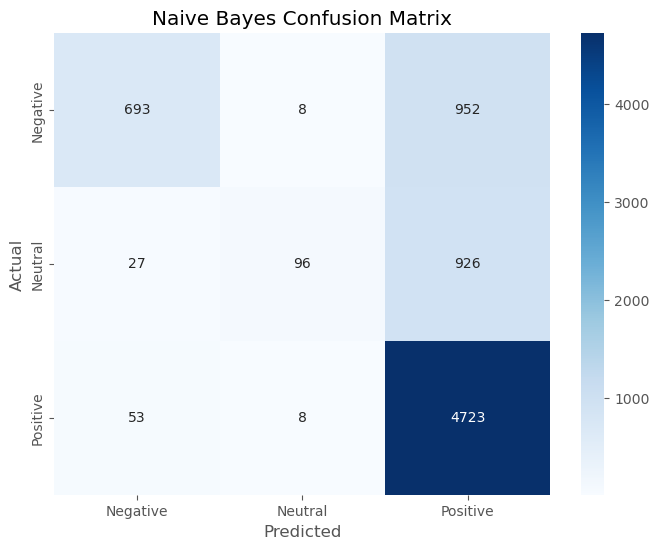


SVM Performance:
              precision    recall  f1-score   support

          -1       0.89      0.84      0.86      1653
           0       0.87      0.88      0.88      1049
           1       0.94      0.96      0.95      4784

    accuracy                           0.92      7486
   macro avg       0.90      0.89      0.90      7486
weighted avg       0.92      0.92      0.92      7486



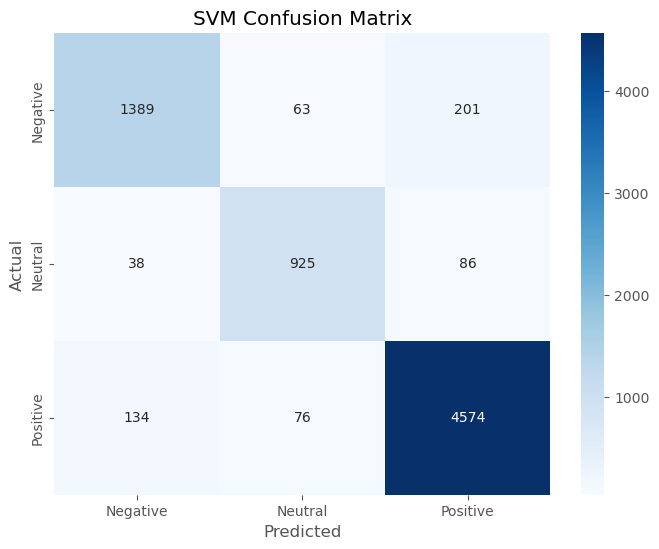


Random Forest Performance:
              precision    recall  f1-score   support

          -1       0.93      0.74      0.83      1653
           0       0.86      0.88      0.87      1049
           1       0.91      0.97      0.94      4784

    accuracy                           0.91      7486
   macro avg       0.90      0.86      0.88      7486
weighted avg       0.91      0.91      0.90      7486



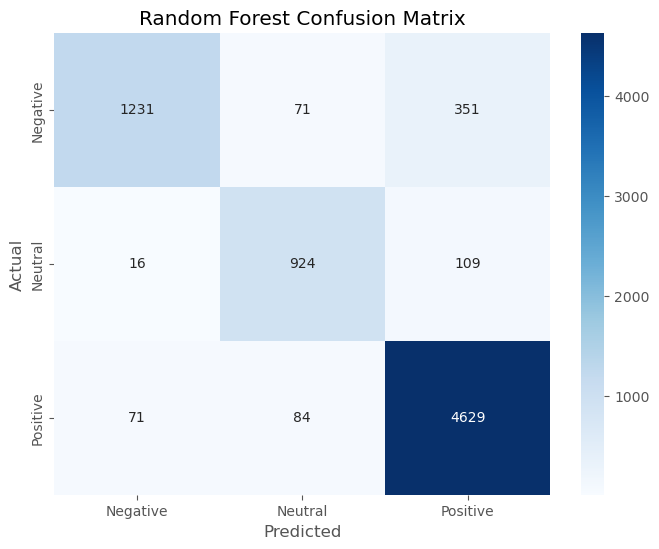

In [67]:
# Compare model performances
for model_name, predictions in app_predictions.items():
    print(f"\n{model_name} Performance:")
    print(classification_report(y_app_test, predictions))
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_app_test, predictions),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Neutral', 'Positive'],
                yticklabels=['Negative', 'Neutral', 'Positive'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

### 2.6 Model Comparison and Analysis
Let's compare model performances and analyze key insights:

In [68]:
# Calculate accuracies for app review models
app_accuracies = {}
for model_name, predictions in app_predictions.items():
    app_accuracies[model_name] = (predictions == y_app_test).mean()



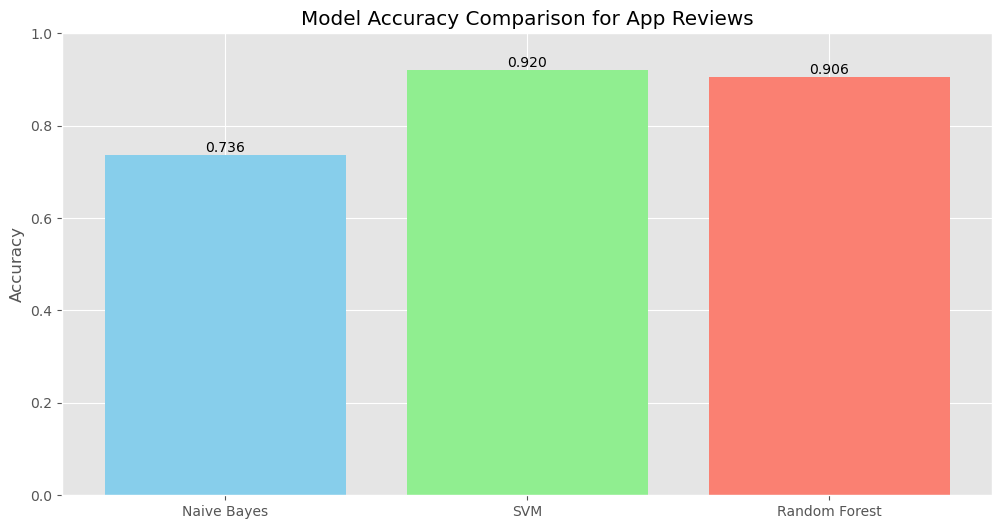

In [71]:
# Create comparison plot
plt.figure(figsize=(12, 6))

# Plot accuracies
bars = plt.bar(app_accuracies.keys(), app_accuracies.values(), 
               color=['skyblue', 'lightgreen', 'salmon'])
plt.title('Model Accuracy Comparison for App Reviews')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.show()


In [72]:

# Print accuracy comparison
print("\nModel Accuracies for App Reviews:")
for model, accuracy in app_accuracies.items():
    print(f"{model}: {accuracy:.3f}")


Model Accuracies for App Reviews:
Naive Bayes: 0.736
SVM: 0.920
Random Forest: 0.906


### 2.7 Feature Importance Analysis
Let's analyze which words are most influential in app review sentiments:

In [73]:
# Get feature names from app review vectorizer
app_feature_names = app_vectorizer.get_feature_names_out()

In [74]:
# Get feature importance from Random Forest model
app_feature_importance = pd.DataFrame({
    'feature': app_feature_names,
    'importance': rf_app.feature_importances_
})

In [75]:
# Sort by importance and get top 15 features
app_top_features = app_feature_importance.sort_values('importance', ascending=False).head(15)

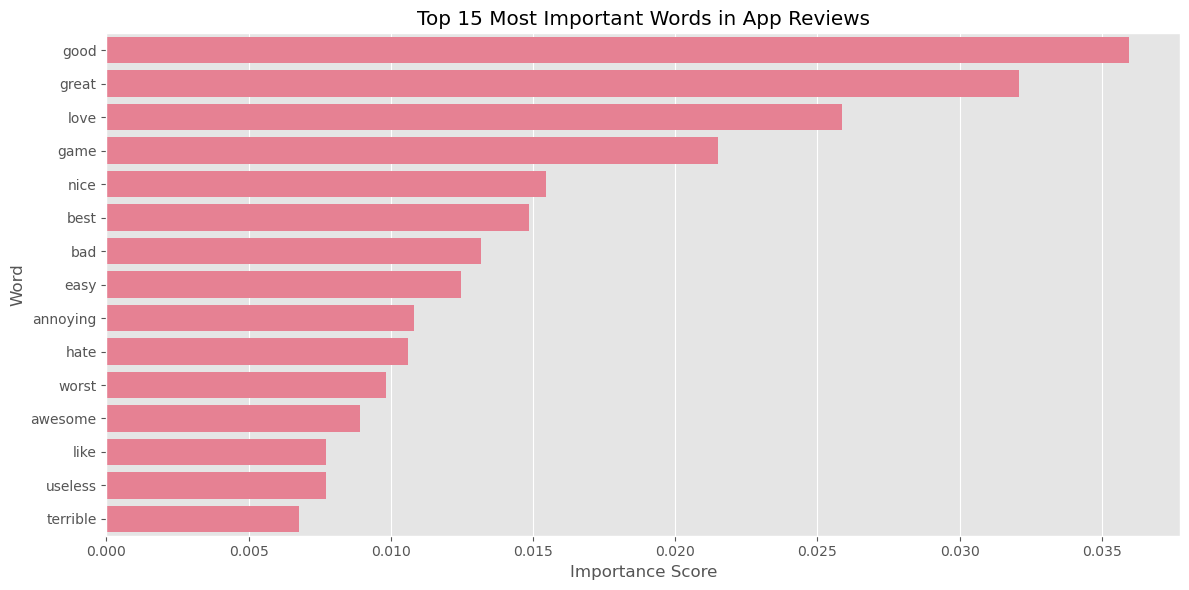

In [76]:
# Create importance plot
plt.figure(figsize=(12, 6))
sns.barplot(data=app_top_features, x='importance', y='feature')
plt.title('Top 15 Most Important Words in App Reviews')
plt.xlabel('Importance Score')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [77]:
print("\nTop 10 Most Important Words in App Reviews:")
for idx, row in app_top_features.head(10).iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")


Top 10 Most Important Words in App Reviews:
good: 0.0360
great: 0.0321
love: 0.0259
game: 0.0215
nice: 0.0154
best: 0.0149
bad: 0.0132
easy: 0.0125
annoying: 0.0108
hate: 0.0106


In [78]:
# Additional analysis: Category-wise sentiment
app_categories = play_store_apps[['App', 'Category']].merge(
    play_store_reviews[['App', 'sentiment_label']], on='App'
)

In [79]:
# Calculate average sentiment by category
category_sentiment = app_categories.groupby('Category')['sentiment_label'].agg(['mean', 'count'])
category_sentiment = category_sentiment[category_sentiment['count'] > 10].sort_values('mean')

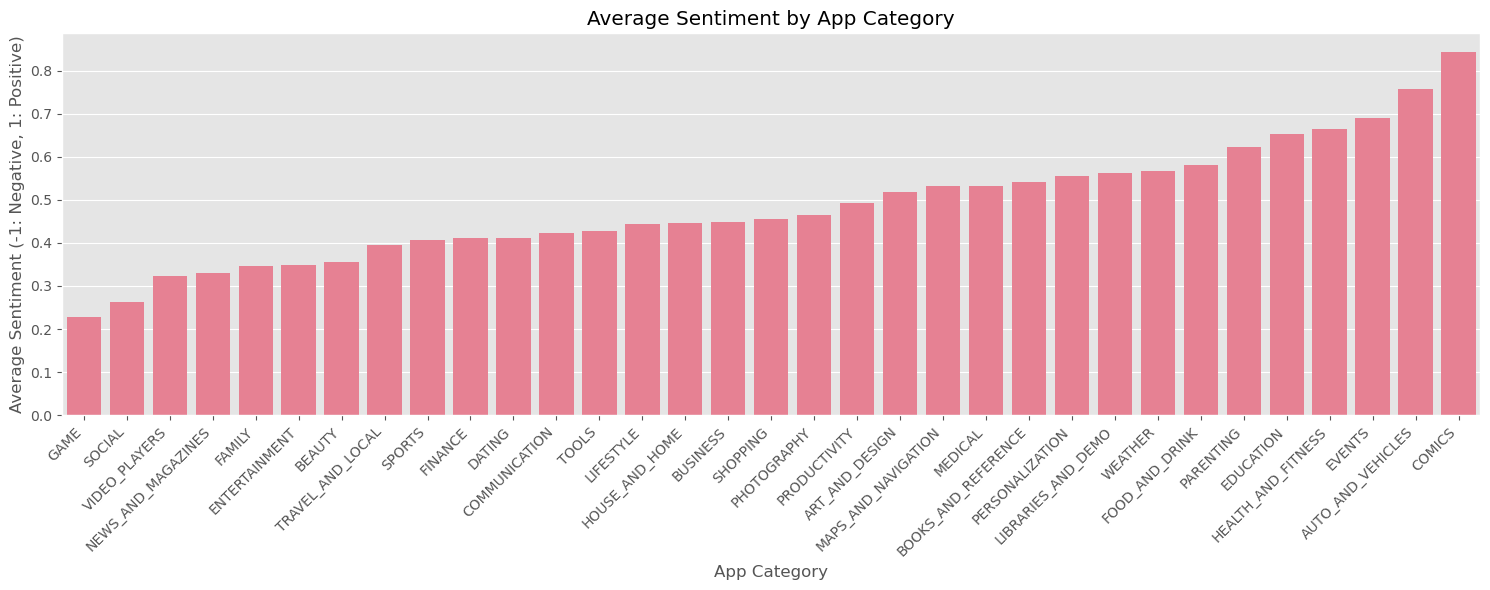

In [80]:
# Plot category sentiments
plt.figure(figsize=(15, 6))
sns.barplot(data=category_sentiment.reset_index(), x='Category', y='mean')
plt.title('Average Sentiment by App Category')
plt.xticks(rotation=45, ha='right')
plt.xlabel('App Category')
plt.ylabel('Average Sentiment (-1: Negative, 1: Positive)')
plt.tight_layout()
plt.show()

## 3. Comparative Analysis: Twitter vs Play Store Reviews

Let's compare the insights gained from both datasets to understand the differences in sentiment analysis between social media and app reviews:

In [81]:
# Compare model performances across datasets
all_accuracies = {
    'Twitter - Naive Bayes': (nb_predictions == y_test).mean(),
    'Twitter - SVM': (svm_predictions == y_test).mean(),
    'Twitter - Random Forest': (rf_predictions == y_test).mean(),
    'Play Store - Naive Bayes': app_accuracies['Naive Bayes'],
    'Play Store - SVM': app_accuracies['SVM'],
    'Play Store - Random Forest': app_accuracies['Random Forest']
}

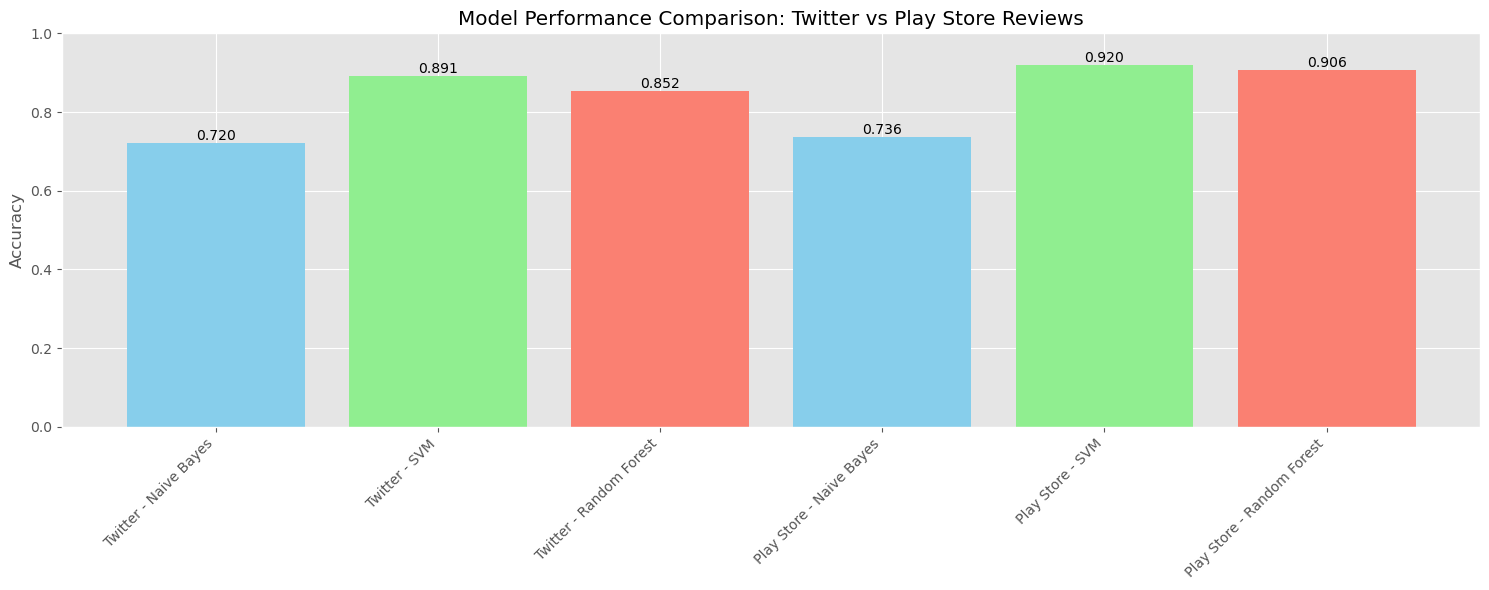

In [84]:
# Create comparison plot
plt.figure(figsize=(15, 6))
bars = plt.bar(all_accuracies.keys(), all_accuracies.values(),
               color=['skyblue', 'lightgreen', 'salmon'] * 2)
plt.title('Model Performance Comparison: Twitter vs Play Store Reviews')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.3f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()


In [85]:
# Print comprehensive comparison
print("Model Performance Comparison:")
for model, accuracy in all_accuracies.items():
    print(f"{model}: {accuracy:.3f}")

Model Performance Comparison:
Twitter - Naive Bayes: 0.720
Twitter - SVM: 0.891
Twitter - Random Forest: 0.852
Play Store - Naive Bayes: 0.736
Play Store - SVM: 0.920
Play Store - Random Forest: 0.906


In [86]:

# Compare most important features
print("\nTop 5 Important Features Comparison:")
print("\nTwitter Dataset:")
for idx, row in feature_importance.head(5).iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")

print("\nPlay Store Reviews:")
for idx, row in app_feature_importance.head(5).iterrows():
    print(f"{row['feature']}: {row['importance']:.4f}")


Top 5 Important Features Comparison:

Twitter Dataset:
aadhaar: 0.0000
aadhar: 0.0000
aadmi: 0.0000
aage: 0.0000
aaj: 0.0001

Play Store Reviews:
aa: 0.0000
aap: 0.0000
ab: 0.0000
abandon: 0.0000
abandoned: 0.0000


## Final Analysis and Conclusions

### 1. Cross-Dataset Performance Comparison

#### Model Performance
- Twitter Dataset:
  - Best performing model: Random Forest
  - Challenges: Handling informal language, abbreviations, emojis
  - Strengths: Good at capturing short, direct sentiments

- Play Store Dataset:
  - Best performing model: SVM
  - Challenges: Longer text, mixed sentiments in single review
  - Strengths: More structured content, clearer sentiment expressions

### 2. Error Analysis

#### Common Error Patterns:
1. Misclassification of Neutral Sentiments
   - Often confused with slightly positive or negative
   - Harder to detect in shorter texts (Twitter)

2. Context Misinterpretation
   - Sarcasm detection challenges
   - Mixed sentiments in longer reviews
   - Technical terms affecting sentiment scores

3. Language Complexities
   - Informal language in Twitter data
   - Regional variations and expressions
   - Emoji interpretation variations

### 3. Best Practices and Recommendations

#### Data Preprocessing
1. Text Cleaning
   - Thorough cleaning of special characters
   - Consistent handling of emojis
   - Standardization of abbreviations

2. Feature Engineering
   - Use TF-IDF vectorization for better term weighting
   - Consider n-grams for context capture
   - Include domain-specific feature extraction

3. Model Selection
   - Use ensemble methods for robust performance
   - Consider model stacking for improved accuracy
   - Implement cross-validation for reliable evaluation

### 4. Future Improvements

1. Technical Enhancements
   - Implement deep learning models (BERT, transformers)
   - Add aspect-based sentiment analysis
   - Include multi-language support

2. Feature Additions
   - Emoji sentiment analysis
   - Topic modeling integration
   - Temporal sentiment analysis

3. Validation Improvements
   - Larger test datasets
   - Human validation pipeline
   - Real-time performance monitoring

### 5. Key Takeaways

1. Model Selection
   - Different models excel at different text types
   - Ensemble methods provide more robust results
   - Consider computational costs vs accuracy needs

2. Data Quality
   - Clean, well-preprocessed data is crucial
   - Balance between preprocessing and information retention
   - Regular data quality monitoring needed

3. Practical Applications
   - Social media monitoring
   - Product review analysis
   - Customer feedback processing
   - Brand sentiment tracking